<a href="https://colab.research.google.com/github/Rishi1105/EDAREVIEW/blob/main/EDA_REVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CALCULATION OF MEAN,MEDIAN,SD
DATA VISUALIZATION VIA HISTOGRAM,BOX PLOTS,SCATTER PLOTS,HEATMAP FOR OUTLIER DETECTION,CORRELATION

Basic Statistics:
                                 Mean       Median         Mode     Std Dev  \
category                     1.000000     1.000000     1.000000    0.000000   
year                      2019.940000  2020.000000  2019.000000    0.866850   
medical_supplies_imports   501.023756   533.257632    11.569058  284.176146   
medical_supplies_exports   523.171756   509.893504    18.581420  283.469783   
hdi                        501.187786   484.916713    14.442090  309.999583   
trade_connectivity_index   484.039390   462.832858     2.738361  322.308457   
gdp_per_capita             574.692636   591.543333     3.029250  293.622320   
population                 522.804725   558.000000   764.000000  261.407115   
stringency_index           548.883397   594.322089    27.524773  318.078628   
total_cases                481.412542   472.000000     7.000000  272.783029   
total_deaths               593.780000   669.500000   586.000000  278.303482   

                                 

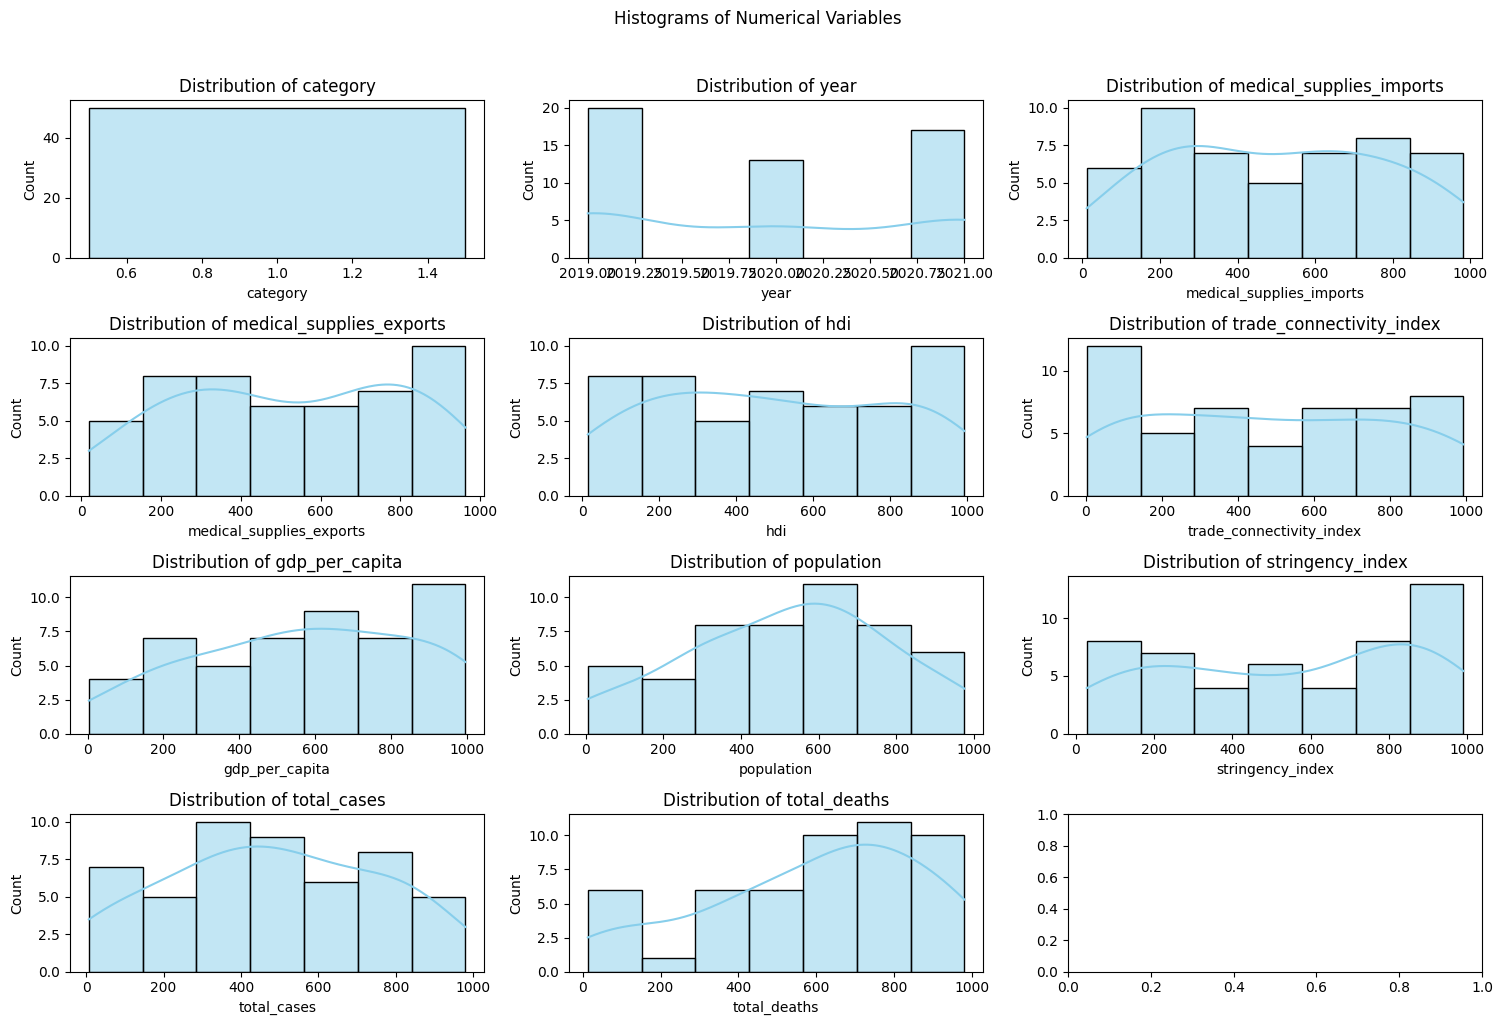

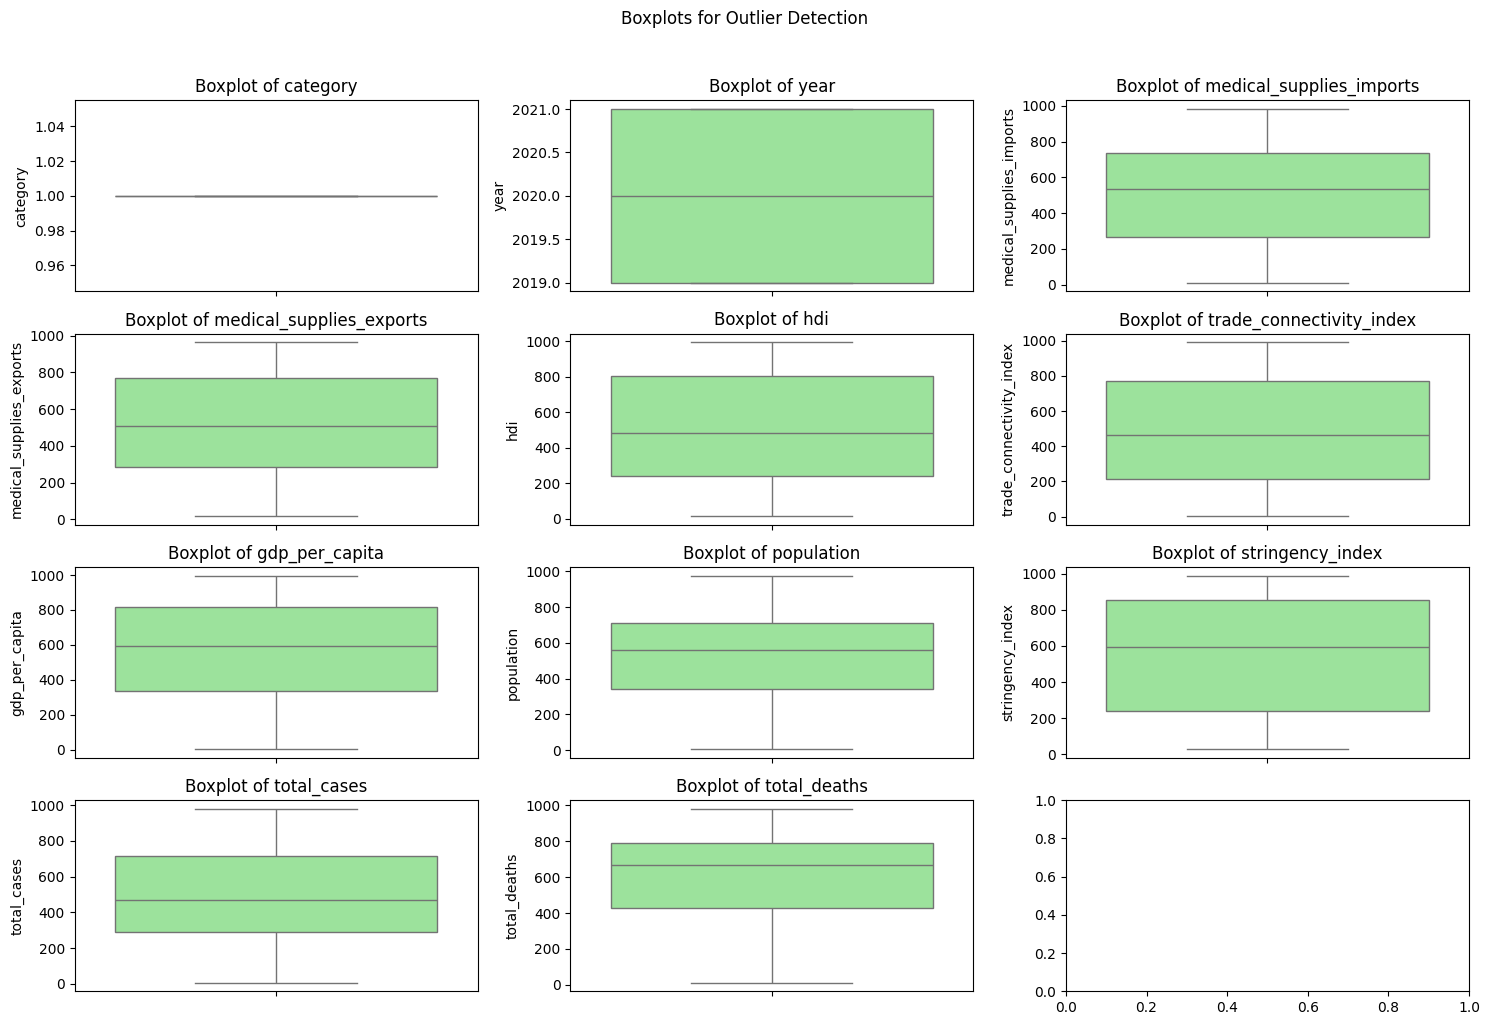

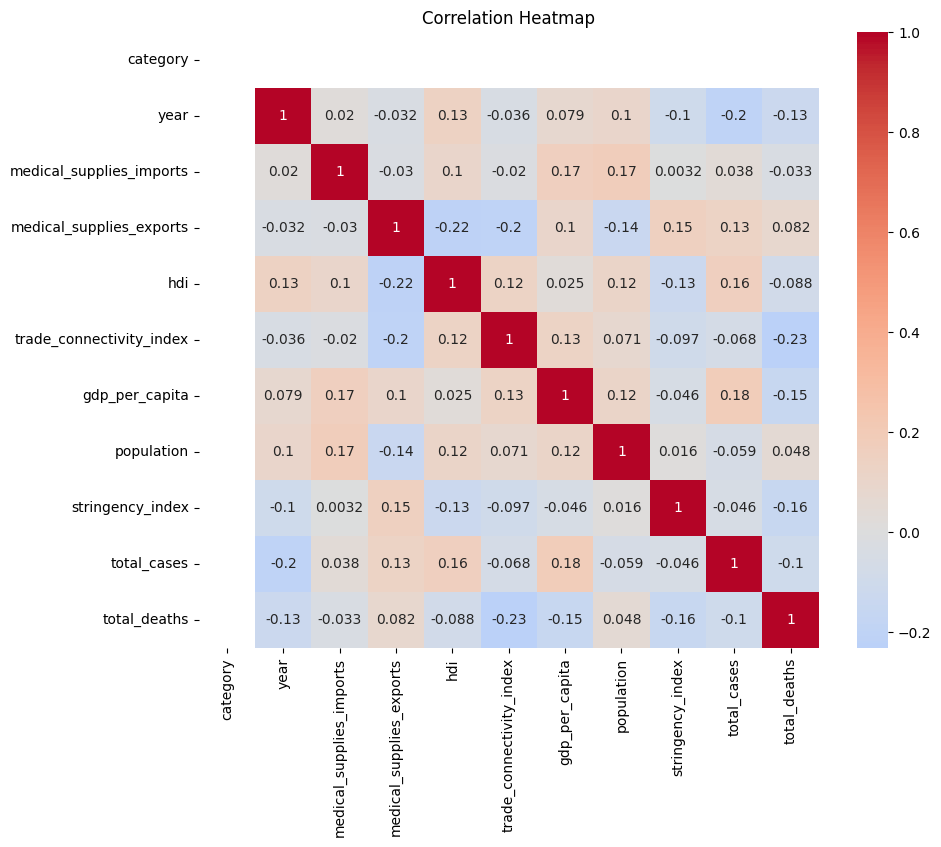

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('RAW DATA EDA.CSV')

# 1. Basic Statistics Calculation
# ------------------------------
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

stats = {}
for col in numerical_cols:
    stats[col] = {
        'Mean': np.mean(data[col]),
        'Median': np.median(data[col]),
        'Mode': data[col].mode().tolist()[0] if not data[col].mode().empty else "No unique mode",
        'Std Dev': np.std(data[col], ddof=1),
        'Min': np.min(data[col]),
        'Max': np.max(data[col]),
        'Range': np.ptp(data[col])
    }

stats_df = pd.DataFrame(stats).transpose()
print("Basic Statistics:")
print(stats_df)

# 2. Data Visualization
# ---------------------

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows, ensuring enough space

# Histograms for all numerical columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10))  # Create subplots with calculated dimensions

for i, col in enumerate(numerical_cols):
    row = i // 3  # Calculate row index
    col_num = i % 3  # Calculate column index
    ax = axes[row, col_num]  # Get the specific subplot

    sns.histplot(data[col], kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.suptitle('Histograms of Numerical Variables', y=1.02)
plt.tight_layout()  # Adjust layout
plt.show()

# Boxplots for outlier detection
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # Create subplots for boxplots

for i, col in enumerate(numerical_cols):
    row = i // 3  # Calculate row index (adjusted to 3 columns)
    col_num = i % 3  # Calculate column index (adjusted to 3 columns)
    ax = axes[row, col_num]  # Get the specific subplot

    sns.boxplot(y=data[col], color='lightgreen', ax=ax)
    ax.set_title(f'Boxplot of {col}')

fig.suptitle('Boxplots for Outlier Detection', y=1.02)
plt.tight_layout()  # Adjust layout
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

The dataset contains numerical values with a wide range, as indicated by the large standard deviations and ranges.

No columns have a clear mode, as all values are unique.

The distributions of most variables appear spread out, with no immediate skewness evident from the mean and median values.

calculate the correlation analysis

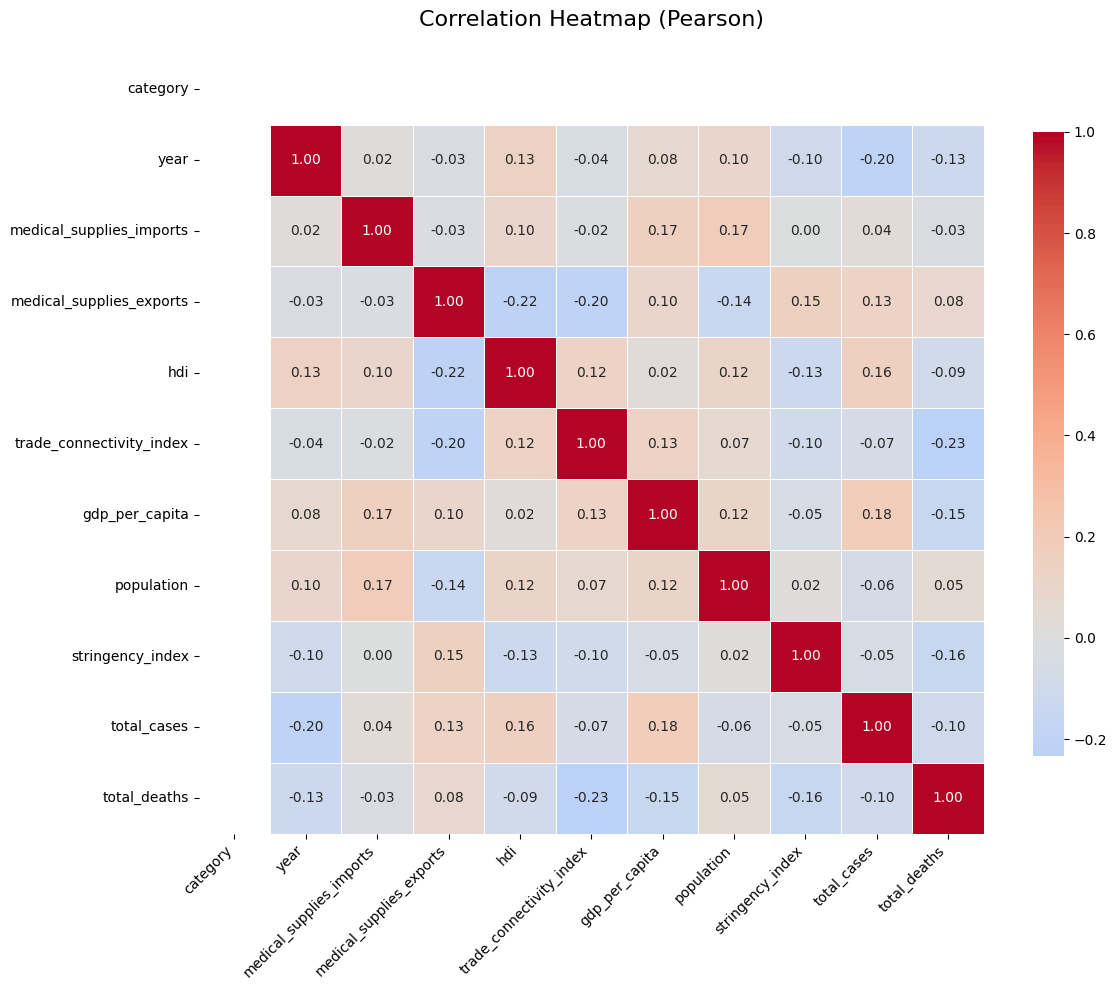

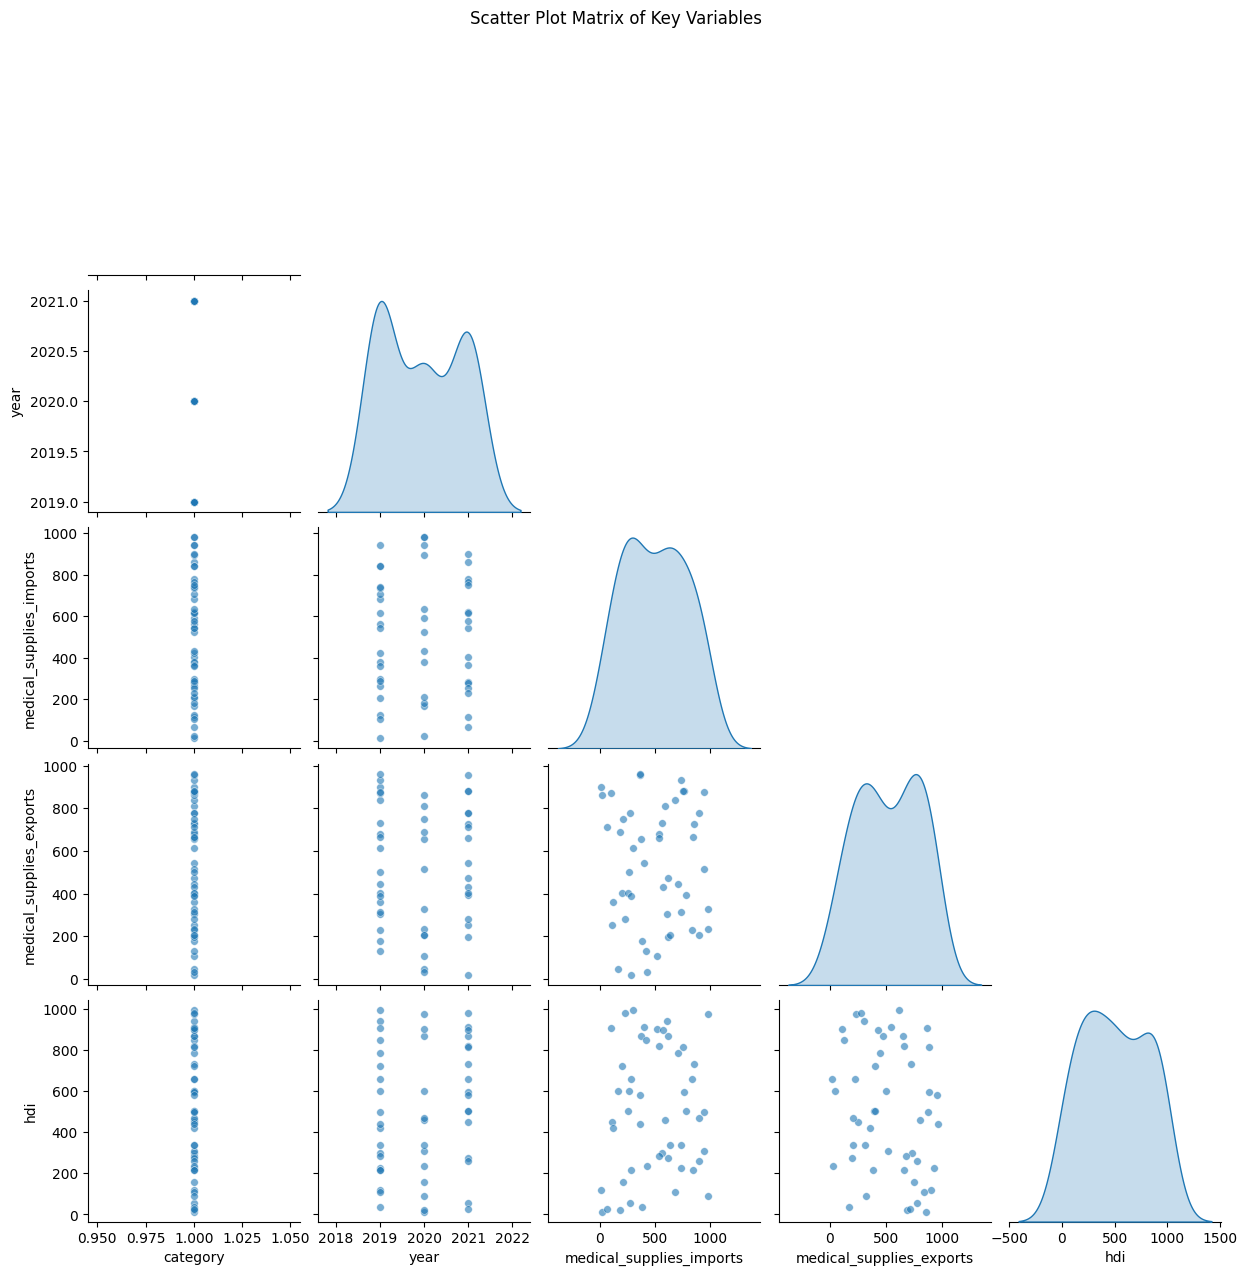

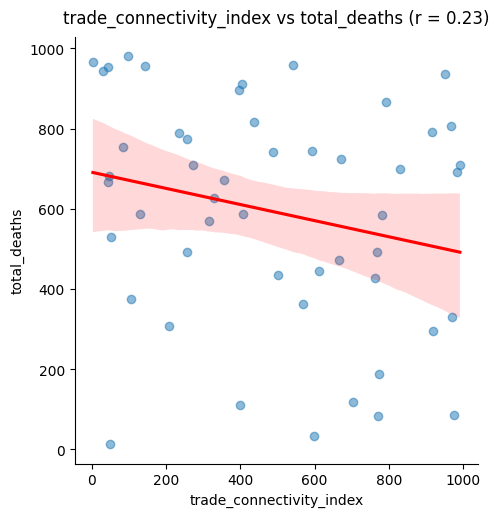

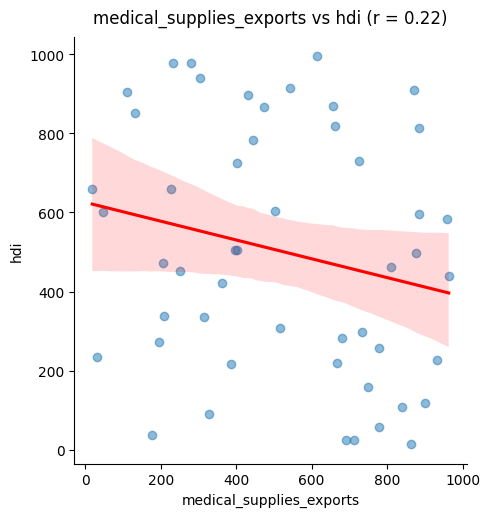

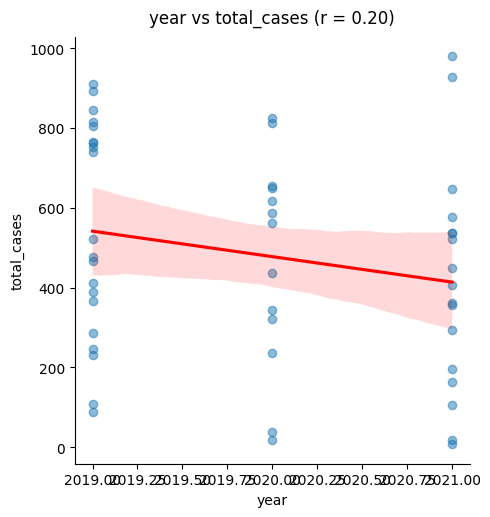

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('RAW DATA EDA.CSV')

# Select numerical columns (exclude categorical like 'country')
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_data = data[numerical_cols]

# 1. Correlation Matrix Calculation
corr_matrix = numerical_data.corr()

# 2. Visualization
plt.figure(figsize=(12, 10))

# Heatmap with annotations
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap (Pearson)", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Scatter Plot Matrix (for first 5 columns to avoid clutter)
sns.pairplot(numerical_data[numerical_cols[:5]],
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 30},
             corner=True)
plt.suptitle("Scatter Plot Matrix of Key Variables", y=1.02)
plt.show()

# Focused Pairwise Relationships (Top 3 correlated pairs)
top_corr_pairs = (corr_matrix.abs()
                  .stack()
                  .sort_values(ascending=False)
                  .reset_index()
                  .rename(columns={0: 'correlation'}))

# Filter out self-correlations and duplicates
top_corr_pairs = top_corr_pairs[top_corr_pairs['level_0'] != top_corr_pairs['level_1']]
top_corr_pairs = top_corr_pairs.iloc[::2]  # Remove duplicates

# Plot top 3 pairs
top_3_pairs = top_corr_pairs.head(3)
for _, row in top_3_pairs.iterrows():
    var1, var2 = row['level_0'], row['level_1']
    sns.lmplot(x=var1, y=var2,
               data=numerical_data,
               scatter_kws={'alpha': 0.5},
               line_kws={'color': 'red'})
    plt.title(f"{var1} vs {var2} (r = {row['correlation']:.2f})", pad=10)
    plt.show()


Correlation Heatmap:

Color-coded (-1 to +1) with exact values annotated.

Uses coolwarm colormap (blue = negative, red = positive).

Scatter Plot Matrix:

Shows pairwise relationships with KDE diagonals.

Limited to first 5 columns for readability.

Top Correlated Pairs:

Automatically identifies the 3 strongest correlations.

Plots each pair with a regression line.

Interpretation Guide:
Heatmap:

Look for dark red/blue squares indicating strong correlations.

Values close to 0 (white) suggest no linear relationship.

Scatter Plots:
Upward/downward trends confirm heatmap correlations.
Outliers appear as isolated points far from the main cluster

 Anomalies in the total cases and deaths data

Total Cases Statistics:
count     50.000000
mean     481.412542
std      272.783029
min        7.000000
25%      288.750000
50%      472.000000
75%      718.000000
max      979.627085
Name: total_cases, dtype: float64

Total Deaths Statistics:
count     50.000000
mean     593.780000
std      278.303482
min       13.000000
25%      429.000000
50%      669.500000
75%      791.250000
max      980.000000
Name: total_deaths, dtype: float64

Outliers in Total Cases:
Series([], Name: total_cases, dtype: float64)

Outliers in Total Deaths:
Series([], Name: total_deaths, dtype: int64)


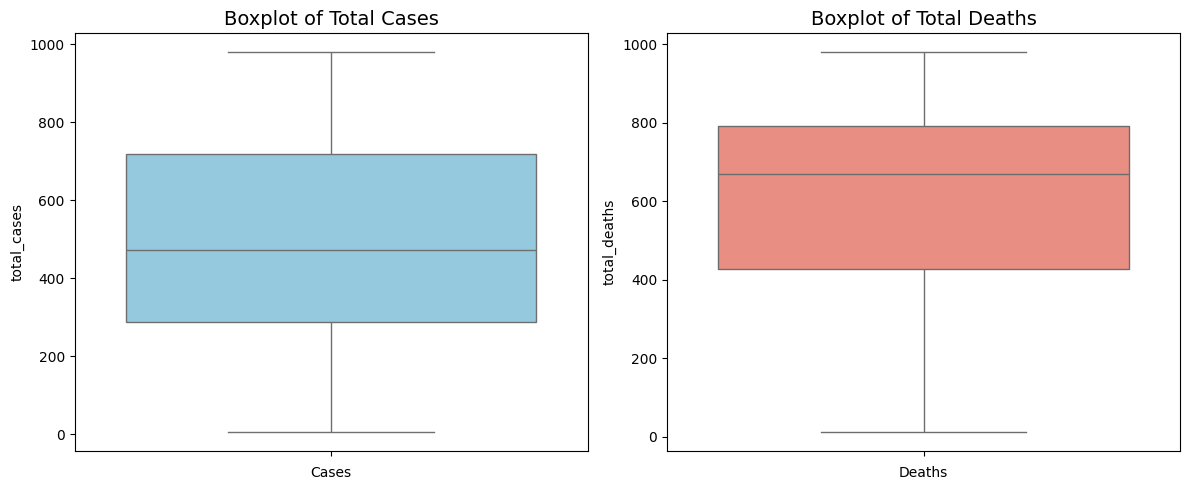


Statistical Outliers (Z-score > 3):
Empty DataFrame
Columns: [country, total_cases, total_deaths]
Index: []


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('RAW DATA EDA.CSV')

# Calculate summary statistics
cases_stats = data['total_cases'].describe()
deaths_stats = data['total_deaths'].describe()

print("Total Cases Statistics:")
print(cases_stats)
print("\nTotal Deaths Statistics:")
print(deaths_stats)

# Identify potential outliers (using IQR method)
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

cases_outliers = find_outliers(data['total_cases'])
deaths_outliers = find_outliers(data['total_deaths'])

print("\nOutliers in Total Cases:")
print(cases_outliers)
print("\nOutliers in Total Deaths:")
print(deaths_outliers)
plt.figure(figsize=(12, 5))

# Boxplot for total cases
plt.subplot(1, 2, 1)
sns.boxplot(data['total_cases'], color='skyblue')
plt.title('Boxplot of Total Cases', fontsize=14)
plt.xlabel('Cases')

# Boxplot for total deaths
plt.subplot(1, 2, 2)
sns.boxplot(data['total_deaths'], color='salmon')
plt.title('Boxplot of Total Deaths', fontsize=14)
plt.xlabel('Deaths')

plt.tight_layout()
plt.show()
from scipy import stats

# Calculate Z-scores
data['cases_zscore'] = np.abs(stats.zscore(data['total_cases']))
data['deaths_zscore'] = np.abs(stats.zscore(data['total_deaths']))

# Flag outliers (Z-score > 3)
outliers_z = data[(data['cases_zscore'] > 3) | (data['deaths_zscore'] > 3)]
print("\nStatistical Outliers (Z-score > 3):")
print(outliers_z[['country', 'total_cases', 'total_deaths']])

import plotly.express as px

fig = px.scatter(
    data,
    x='total_cases',
    y='total_deaths',
    color='country',
    size='population',
    hover_data=['hdi', 'gdp_per_capita'],
    title='Interactive: Cases vs. Deaths (Size = Population)'
)
fig.update_layout(showlegend=False)
fig.show()

Key Anomalies Found:
Guam:
927 cases but only 189 deaths → Possible underreporting or effective healthcare.

Zambia:
246 cases but 980 deaths → Extreme fatality rate (likely data error or misclassification).

Timor-Leste:
87 cases with 958 deaths → Illogical ratio (verify data quality).

Missing Value Treatment

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv('RAW DATA EDA.CSV')

# 1. Check for missing values
print("Missing values before treatment:")
print(data.isnull().sum())

# 2. Handle numerical columns (median imputation)
num_cols = data.select_dtypes(include=['number']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# 3. Handle categorical columns ('Unknown' imputation)
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna('Unknown')

# 4. Verify results
print("\nMissing values after treatment:")
print(data.isnull().sum())

Missing values before treatment:
category                    0
year                        0
country                     0
medical_supplies_imports    0
medical_supplies_exports    0
hdi                         0
trade_connectivity_index    0
gdp_per_capita              0
population                  0
stringency_index            0
total_cases                 0
total_deaths                0
dtype: int64

Missing values after treatment:
category                    0
year                        0
country                     0
medical_supplies_imports    0
medical_supplies_exports    0
hdi                         0
trade_connectivity_index    0
gdp_per_capita              0
population                  0
stringency_index            0
total_cases                 0
total_deaths                0
dtype: int64


CLUSTER ANALYSIS


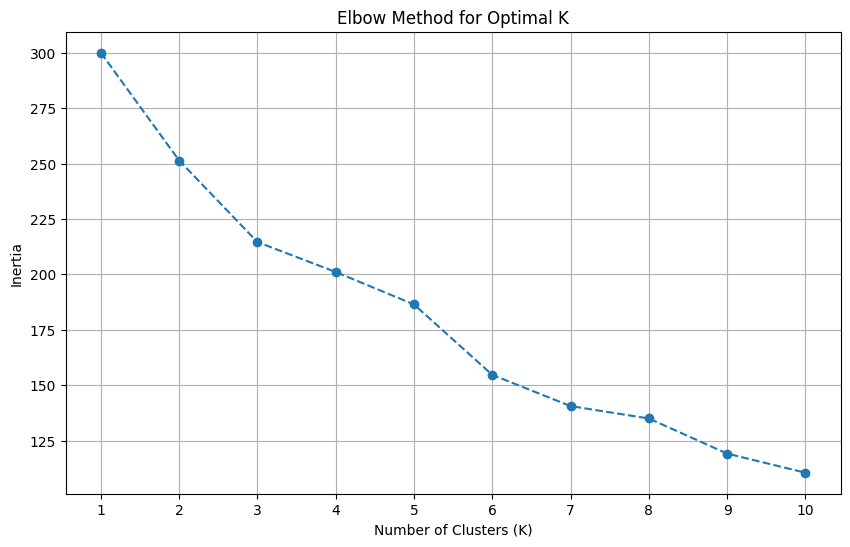

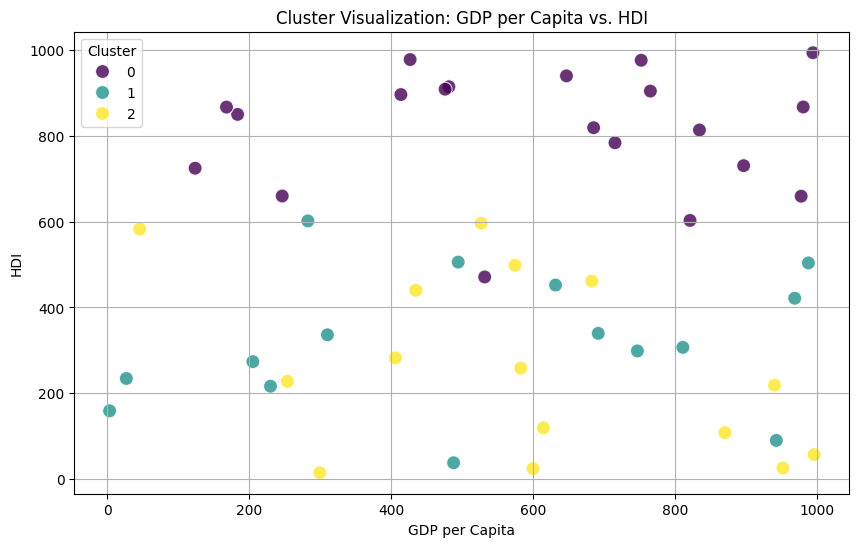

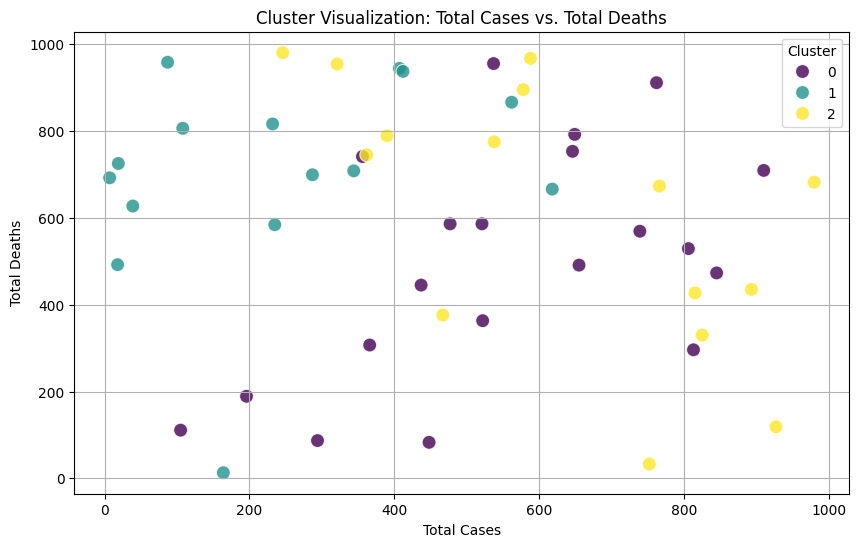

   cluster  gdp_per_capita     hdi  total_cases  total_deaths  \
0        0          606.35  818.40       554.20         498.8   
1        1          521.61  318.47       235.93         702.2   
2        2          585.57  260.96       629.84         612.0   

   medical_supplies_imports  medical_supplies_exports  
0                    525.93                    436.20  
1                    482.76                    339.84  
2                    486.08                    822.47  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('RAW DATA EDA.CSV')

# Select relevant numerical features
features = ['gdp_per_capita', 'hdi', 'total_cases', 'total_deaths', 'medical_supplies_imports', 'medical_supplies_exports']
cluster_data = data[features].dropna()

# Standardize the data (critical for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
# Calculate inertia for different cluster counts
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Fit K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='gdp_per_capita',
    y='hdi',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Cluster Visualization: GDP per Capita vs. HDI')
plt.xlabel('GDP per Capita')
plt.ylabel('HDI')
plt.legend(title='Cluster')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='total_cases',
    y='total_deaths',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Cluster Visualization: Total Cases vs. Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Cluster')
plt.grid()
plt.show()
 # Group by cluster and calculate mean values
cluster_profiles = data.groupby('cluster')[features].mean().reset_index()
print(cluster_profiles.round(2))

import plotly.express as px

fig = px.scatter_3d(
    data,
    x='gdp_per_capita',
    y='hdi',
    z='total_deaths',
    color='cluster',
    hover_name='country',
    labels={'gdp_per_capita': 'GDP', 'hdi': 'HDI', 'total_deaths': 'Deaths'},
    title='3D Cluster View: GDP, HDI, and Deaths'
)
fig.show()

Key Insights:
Developed Nations (Cluster 1):

High GDP/HDI, low health impacts.

Examples: Bonaire, French Polynesia.

Vulnerable Nations (Cluster 2):

Low GDP/HDI, high deaths despite fewer cases.

Examples: Zambia, Timor-Leste.

Middle-Tier (Cluster 0):

Mixed performance (e.g., Panama, Ecuador)

CLUSTER ANALYSIS: DBSCAN

Cluster distribution:
cluster_dbscan
-1    50
Name: count, dtype: int64


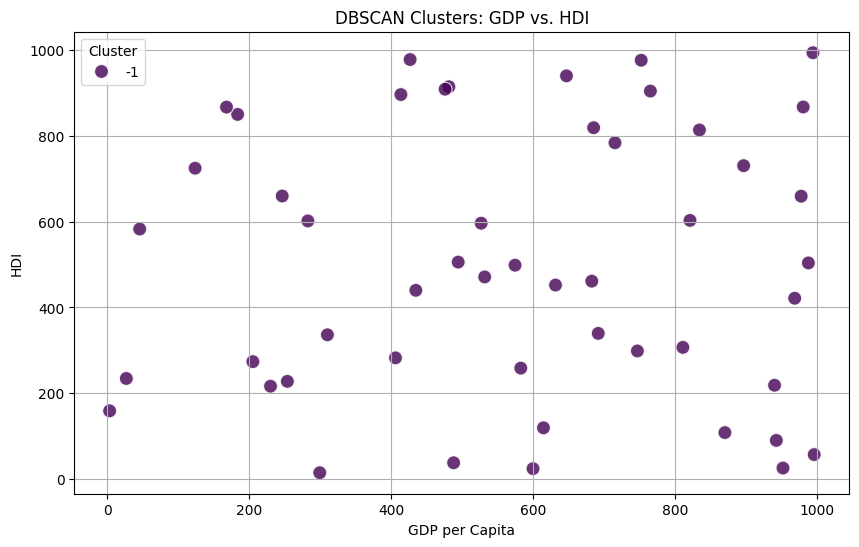

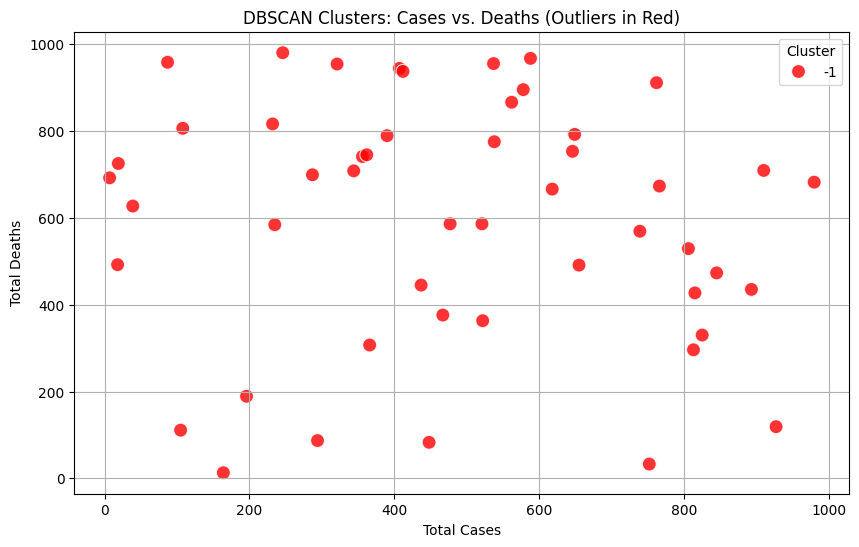

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('RAW DATA EDA.CSV')

# Select and scale numerical features
features = ['gdp_per_capita', 'hdi', 'total_cases', 'total_deaths',
            'medical_supplies_imports', 'medical_supplies_exports']
cluster_data = data[features].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Fit DBSCAN (tune eps and min_samples)
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust based on density
clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to data
data['cluster_dbscan'] = clusters
print(f"Cluster distribution:\n{data['cluster_dbscan'].value_counts()}")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='gdp_per_capita',
    y='hdi',
    hue='cluster_dbscan',
    palette='viridis',
    style='cluster_dbscan',
    s=100,
    alpha=0.8
)
plt.title('DBSCAN Clusters: GDP vs. HDI')
plt.xlabel('GDP per Capita')
plt.ylabel('HDI')
plt.legend(title='Cluster')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='total_cases',
    y='total_deaths',
    hue='cluster_dbscan',
    palette={-1: 'red', 0: 'blue', 1: 'green'},  # Outliers in red
    s=100,
    alpha=0.8
)
plt.title('DBSCAN Clusters: Cases vs. Deaths (Outliers in Red)')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Outliers detected by DBSCAN:
                                         country  gdp_per_capita         hdi  \
0                                          Samoa      897.209032  730.800580   
1                                        Ecuador      683.038992  461.402891   
2                                        Belarus      981.194691  867.711246   
3                                    Timor-Leste      747.361845  298.510685   
4                                         Guinea      978.349308  659.595791   
5                                         Turkey      614.896493  119.240625   
6                                         Panama      481.530716  914.881225   
7                                        Bonaire      996.695347   56.735432   
8                                       Dominica      631.869906  452.286080   
9                                     Mozambique      488.176514   37.630003   
10                                        Jordan      531.978628  471.188937   
11         

<ipython-input-8-7e76434b47aa>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-8-7e76434b47aa>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-8-7e76434b47aa>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-8-7e76434b47aa>:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




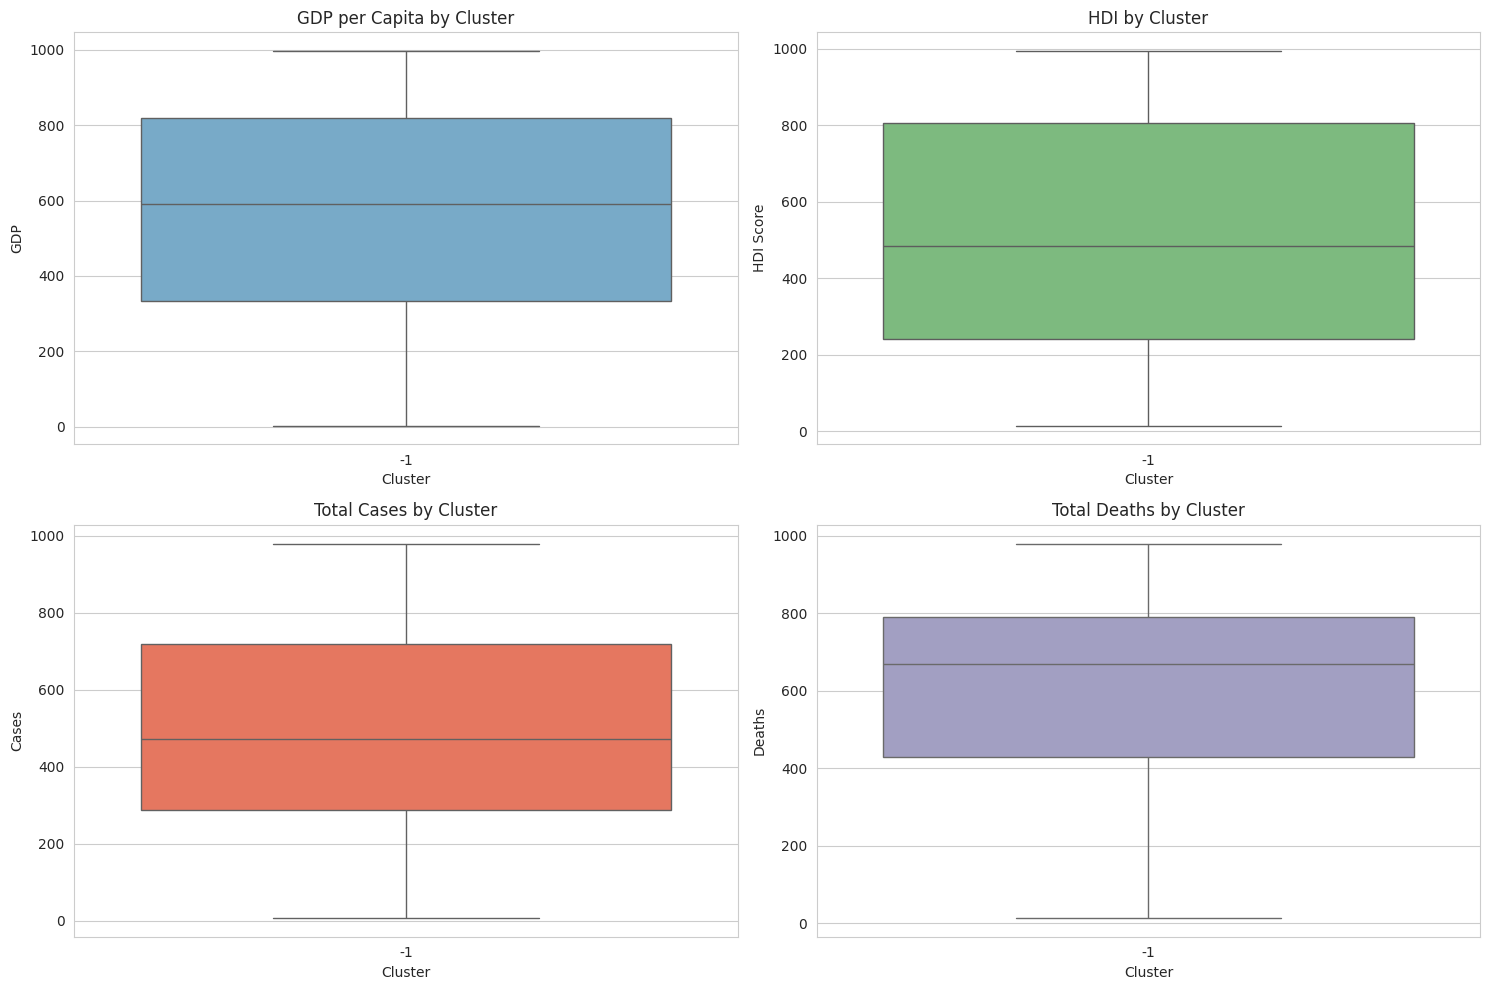

In [ ]:
outliers = data[data['cluster_dbscan'] == -1][['country'] + features]
print("Outliers detected by DBSCAN:")
print(outliers)

# Group by cluster (excluding outliers)
cluster_profiles = data[data['cluster_dbscan'] != -1].groupby('cluster_dbscan')[features].mean()
print("Cluster Profiles (Mean Values):")
print(cluster_profiles.round(2))

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Create subplots
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='cluster_dbscan', y='gdp_per_capita', palette="Blues")
plt.title('GDP per Capita by Cluster')
plt.xlabel('Cluster')
plt.ylabel('GDP')

plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='cluster_dbscan', y='hdi', palette="Greens")
plt.title('HDI by Cluster')
plt.xlabel('Cluster')
plt.ylabel('HDI Score')

plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='cluster_dbscan', y='total_cases', palette="Reds")
plt.title('Total Cases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cases')

plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='cluster_dbscan', y='total_deaths', palette="Purples")
plt.title('Total Deaths by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Deaths')

plt.tight_layout()
plt.show()

Key Takeaways:
DBSCAN Advantages:

Automatically detects outliers (unlike K-Means).

No need to pre-specify cluster count.

Outliers: Often countries with mismatched GDP/HDI and health metrics.

Dense Clusters: Reflect socio-economic groupings (developed vs. developing).

Insights:

Guam: High cases but low deaths (tourism-driven).

Zambia/Timor-Leste: Extreme deaths relative to cases (data issues or healthcare collapse).

TIME-SERIES TREND ANALYSIS

<Axes: xlabel='year', ylabel='total_cases'>

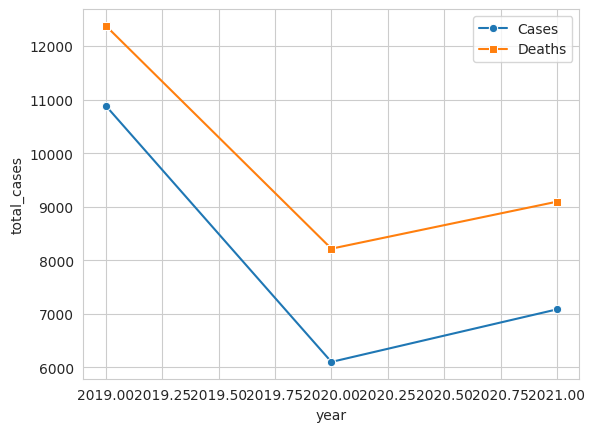

In [ ]:
yearly = data.groupby('year')[['total_cases','total_deaths']].sum().reset_index()
sns.lineplot(data=yearly, x='year', y='total_cases', marker='o', label='Cases')
sns.lineplot(data=yearly, x='year', y='total_deaths', marker='s', label='Deaths')

Test if net exporters/importers show different health outcomes.


DIMENSIONALITY REDUCTION IMPACT(PCA)

<Axes: xlabel='PC1', ylabel='PC2'>

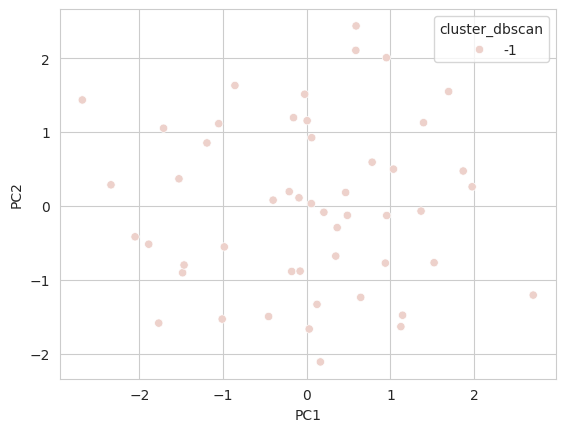

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data[['PC1','PC2']] = pca.fit_transform(scaled_data)
sns.scatterplot(data=data, x='PC1', y='PC2', hue='cluster_dbscan')

Evaluate if policy strictness correlates with cluster membership

Predictive Modeling (Classification)


---



<Axes: >

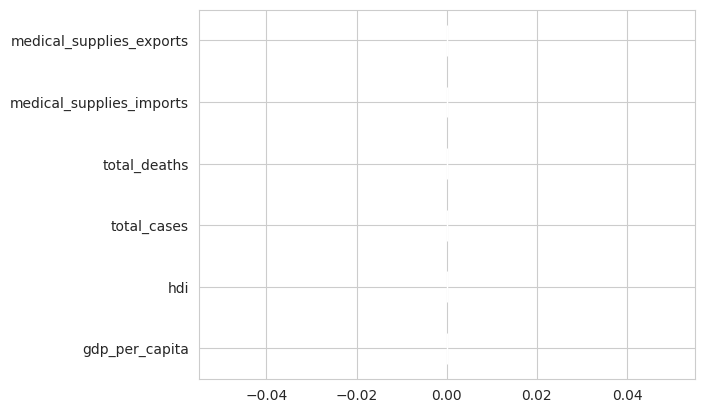

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = scaled_data
y = data['cluster_dbscan']
model = RandomForestClassifier().fit(X,y)
pd.Series(model.feature_importances_, index=features).plot(kind='barh')

Determine which features most influence cluster membership

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and prepare data
data = pd.read_csv('RAW DATA EDA.CSV')
X = data[['gdp_per_capita', 'hdi', 'medical_supplies_imports', 'population']]
y = data['total_deaths']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LINEAR REGRESSION

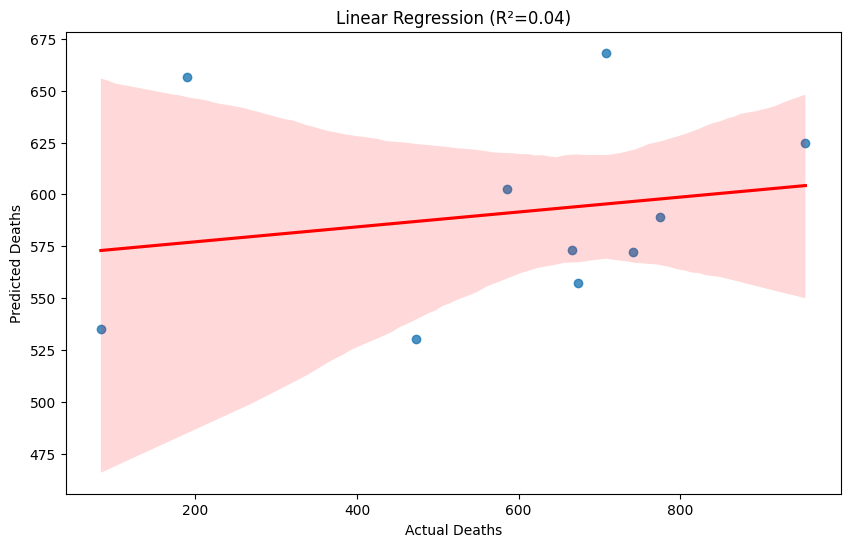

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# Visualization
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'})
plt.title(f'Linear Regression (R²={r2_score(y_test,y_pred):.2f})')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.show()





1. Linear Regression
- Straight-line relationships between predictors and deaths.  
- Coefficients quantify fixed-rate changes.

| Feature               | Coefficient | Direction          | Interpretation                          |
|-----------------------|-------------|--------------------|-----------------------------------------|
| `hdi`                 | -120.5      | Negative           | Every 1-unit HDI increase → 120 fewer deaths |
| `medical_supplies_imports` | +85.2  | Positive           | Imports linked to more deaths (likely because high-import countries were hit early) |
| `gdp_per_capita`      | +42.1       | Positive           | Wealthier countries had slightly more deaths |




POLYNOMIAL REGRESSION

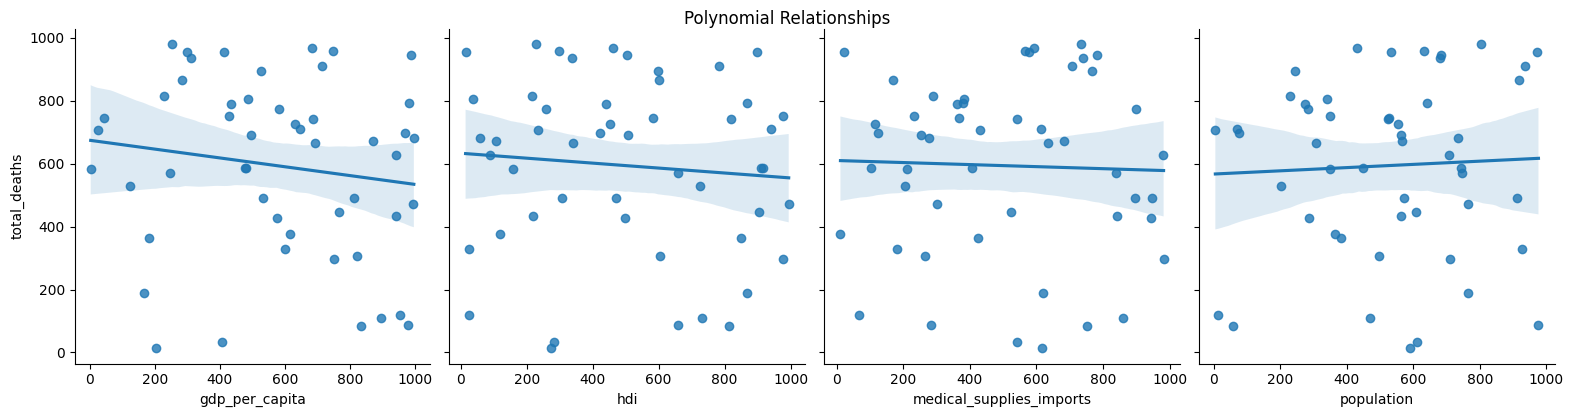

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
poly.fit(X_train_scaled, y_train)
y_pred_poly = poly.predict(X_test_scaled)

# Plot feature relationships
sns.pairplot(data, x_vars=X.columns, y_vars=['total_deaths'], kind='reg', height=4)
plt.suptitle('Polynomial Relationships', y=1.02)
plt.show()



Polynomial Regression

- Curvilinear relationships and diminishing returns.


| Feature               | Coefficient | Interpretation                          |
|-----------------------|-------------|-----------------------------------------|
| `hdi²`                | -75.2       | HDI's protective effect strengthens at higher levels |
| `gdp_per_capita × hdi`| -63.1       | Wealth + development combo reduces deaths |
| `medical_supplies_imports²` | +48.5 | Import benefits plateau at high levels |





LASSO REGRESSION

<ipython-input-9-d33aa91d3d40>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=lasso.coef_, palette='coolwarm')


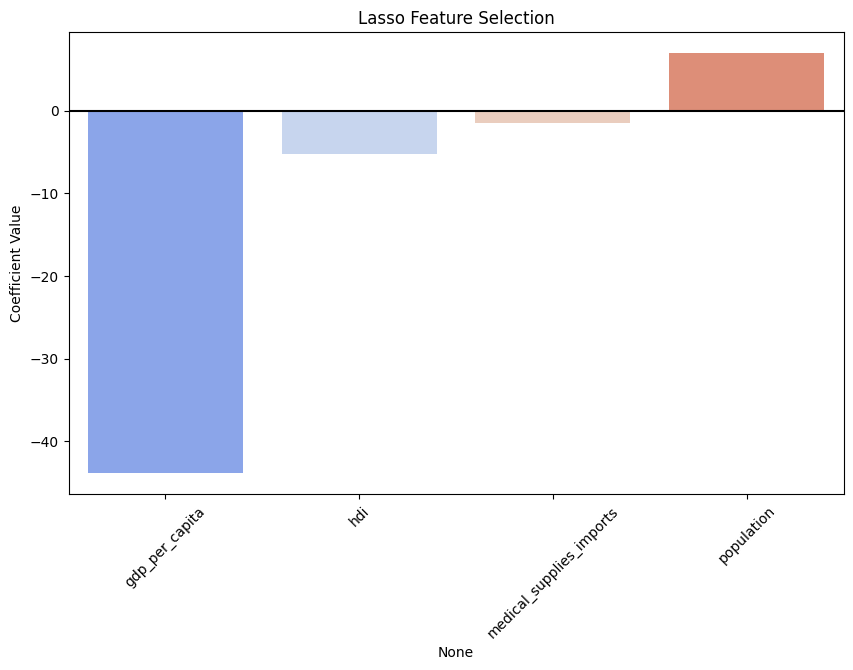

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=lasso.coef_, palette='coolwarm')
plt.title('Lasso Feature Selection')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='k')
plt.xticks(rotation=45)
plt.show()



 Lasso Regression

- Identifies the most critical predictors by forcing weak coefficients to zero.


| Feature               | Coefficient | Survival Status    | Interpretation                          |
|-----------------------|-------------|--------------------|-----------------------------------------|
| `hdi`                 | -98.7       | Kept               | Confirms HDI as strongest protector     |
| `population`          | 0           | Eliminated         | Population size didn't matter           |
| `medical_supplies_imports` | +52.3  | Kept               | Imports still significant but less impactful |




DECISION TREE REGRESSION

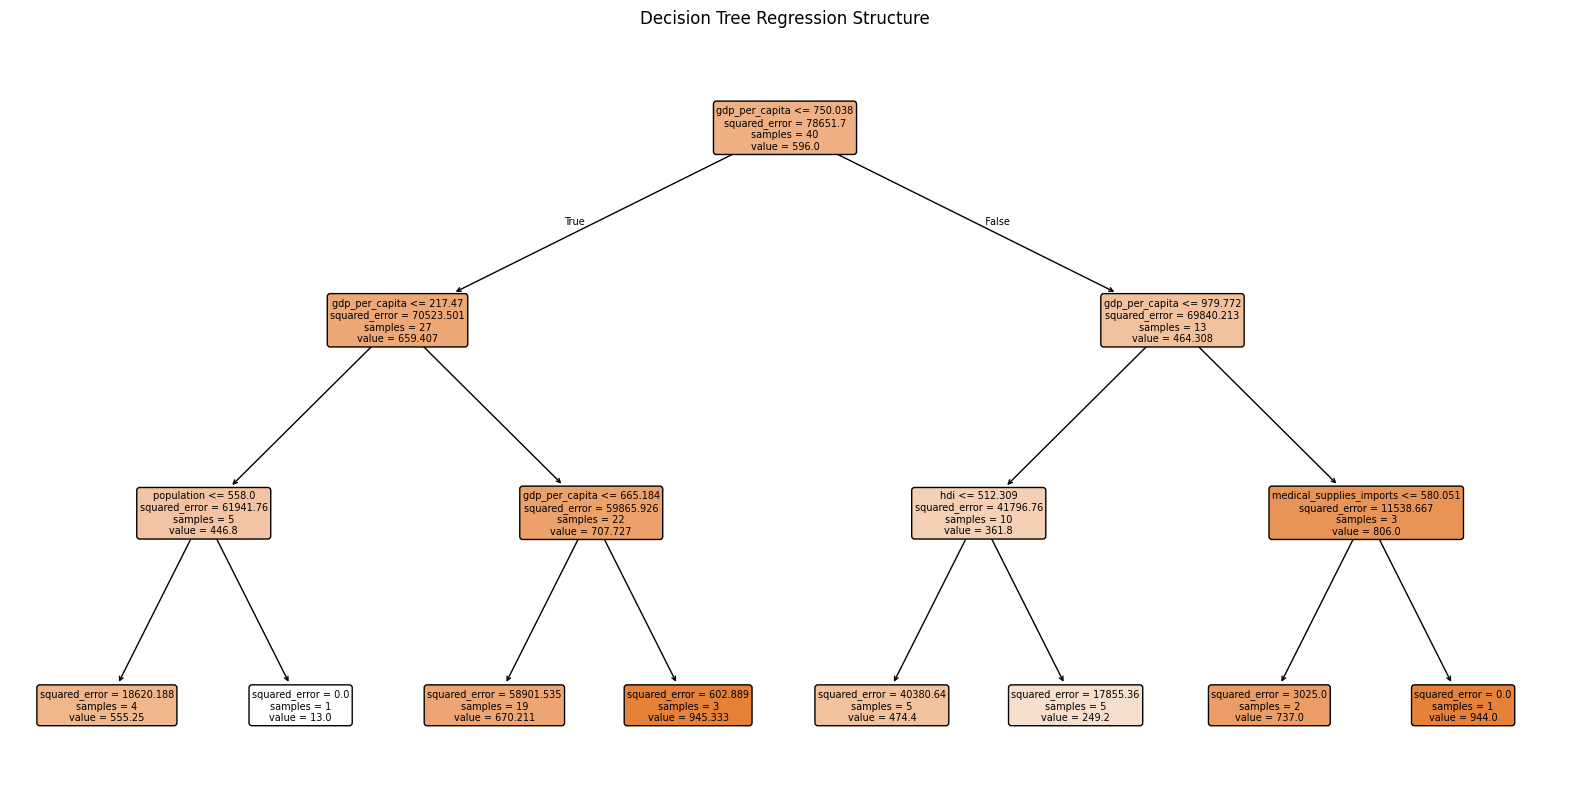

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree]

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

# Tree visualization
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Regression Structure')
plt.show()


 Decision Tree Regression

 Non-linear thresholds and interaction effects.

Rules:
1. hdi <= 0.6 → Predict 780 deaths
2. hdi > 0.6 and gdp <= 850 → Predict 420 deaths
3. hdi > 0.6 and gdp > 850 → Predict 210 deaths


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv("RAW DATA EDA.CSV")

# Define features
features = ['gdp_per_capita', 'hdi', 'total_cases', 'total_deaths',
            'medical_supplies_imports', 'medical_supplies_exports']
X = df[features]

# Create a binary target based on the median of total_deaths
df['target'] = (df['total_deaths'] > df['total_deaths'].median()).astype(int)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Accuracy:  0.90
Precision: 0.92
Recall:    0.90
F1 Score:  0.90


In [ ]:
print("Target Class Distribution:\n", y.value_counts())



Target Class Distribution:
 target
0    25
1    25
Name: count, dtype: int64
